# Corrected version (with more stable LinCKA2) version of the GTRL notebook

In [1]:
import numpy as np
import torch
from utils import LinCKA2
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import sys
from torch import nn

# First Try

In [2]:
# Parameters
mean1 = 0
mean2 = 0
var1 = 1
var2 = 1

num_dim = 100
num_pts = 10000 # per mixture component

seed = 0
np.random.seed(seed)
d = np.random.normal(0,1,[num_dim])
d /= np.linalg.norm(d)
c = 10000

In [9]:
cuda = torch.device('cuda')

# X = np.concatenate( [np.random.normal(mean1, var1, [num_pts, num_dim]), np.random.normal(mean2, var2, [num_pts, num_dim])], axis = 0)
# # Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dim]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dim]))], axis = 0)).to(cuda)
# Y = torch.Tensor(X + c*np.matmul(np.ones([num_pts*2,1]), d.reshape([1,num_dim]))).to(cuda)

X = np.concatenate( [np.random.normal(mean1, var1, [num_pts, num_dim]), np.random.normal(mean2, var2, [num_pts, num_dim])], axis = 0)
Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dim]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dim]))], axis = 0)).to(cuda)


X = torch.Tensor(X).to(cuda)

In [10]:
CKA = LinCKA2()
CKA(X,Y).item()

0.0005096070817671716

In [20]:
X

tensor([[ 0.7042,  0.2750, -0.5491,  ..., -0.8769,  1.5890, -0.2038],
        [-1.3599,  0.8812,  0.1399,  ...,  0.6310, -0.9727, -0.0530],
        [ 0.1036, -0.3273, -0.6270,  ..., -0.5948, -0.3675,  2.3564],
        ...,
        [ 0.2921,  0.3706,  0.6203,  ...,  0.6717,  1.6351, -1.5609],
        [ 0.2111,  0.6120, -1.7222,  ..., -1.1255,  0.9517, -1.1524],
        [ 1.0798,  0.5255,  0.3686,  ...,  0.4763,  1.0121,  0.5359]],
       device='cuda:0')

In [21]:
Y

tensor([[ 7.0422e-01,  2.7504e-01, -5.4907e-01,  ..., -8.7693e-01,
          1.5890e+00, -2.0385e-01],
        [-1.3599e+00,  8.8120e-01,  1.3985e-01,  ...,  6.3098e-01,
         -9.7274e-01, -5.3046e-02],
        [ 1.0363e-01, -3.2733e-01, -6.2704e-01,  ..., -5.9480e-01,
         -3.6755e-01,  2.3564e+00],
        ...,
        [ 1.7475e+03,  3.9670e+02,  9.7000e+02,  ...,  1.7695e+03,
          1.2733e+02,  3.9658e+02],
        [ 1.7474e+03,  3.9694e+02,  9.6766e+02,  ...,  1.7677e+03,
          1.2665e+02,  3.9699e+02],
        [ 1.7483e+03,  3.9686e+02,  9.6975e+02,  ...,  1.7693e+03,
          1.2671e+02,  3.9868e+02]], device='cuda:0')

# 2 Gaussians translation exp

In [82]:
cuda = torch.device('cuda')

def get_cka_test(mean1 = 0,
                 mean2 = 0,
                 var1 = 1,
                 var2 = 1,
                 num_dims = 100,
                 num_pts = 1000,
                 seed = 0,
                 c = 1000,
                 verbose = False,
                 distribution = 'gaussian'):
    np.random.seed(seed)
    
    d = np.random.normal(0,1,[num_dims])
    d /= np.linalg.norm(d)
    
    if distribution == 'gaussian':
        X = np.concatenate( [np.random.normal(mean1, var1, [num_pts, num_dims]), np.random.normal(mean2, var2, [num_pts, num_dims])], axis = 0)
        Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dims]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dims]))], axis = 0)).to(cuda)
    elif distribution == 'uniform':
        # in this case var = side and mean = center
        X = np.concatenate([var1*(np.random.rand(num_pts, num_dims)-0.5*np.ones([num_pts,num_dims]))+mean1*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1), var2*(np.random.rand(num_pts, num_dims)-0.5*np.ones([num_pts,num_dims]))+mean2*np.concatenate([np.ones([num_pts,1]),np.zeros([num_pts,num_dims-1])], axis=1)], axis = 0)
        Y = torch.Tensor(X + np.concatenate([np.zeros([num_pts, num_dims]), c*np.matmul(np.ones([num_pts,1]), d.reshape([1,num_dims]))], axis = 0)).to(cuda)
    
    X = torch.Tensor(X).to(cuda)
    
    CKA = LinCKA2()
    if verbose:
        return CKA(X,Y).item(), torch.where(X==Y)
    else:
        return CKA(X,Y).item()

### Tests

In [24]:
a,b = get_cka_test(verbose= True)

In [26]:
print(len(b[0])) # should equal num_pts*num_dims

100000


# First round of experiments (ALL CONCLUSIONS STILL HOLD WITH LinCKA2)
For same mean only...
Make this work for different means => need to do this for cubes as with the initial experiments

### Generate and save the data

In [ ]:
num_pts_list = [100, 500, 1000, 5000, 10000] #20000 points makes it crash
num_dims_list = [3, 5, 10, 50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 3000]#, 5000, 10000]
c_list = [1, 5, 10, 25, 50, 75, 100, 200, 300, 400, 500, 1000, 10000, 20000]


data = np.zeros([len(num_pts_list), len(num_dims_list), len(c_list)])
for i1, num_pts in enumerate(num_pts_list):
    for i2, num_dims in enumerate(num_dims_list):
        for i3, c in enumerate(c_list):
            print('Num pts {}; num dims {}; c {}'.format(num_pts, num_dims, c))
            data[i1, i2, i3] = get_cka_test(mean1=0, mean2=1.1, num_dims = num_dims, num_pts = num_pts, c = c, distribution = 'uniform')
            
np.save('data/two_cubes_exp_lincka2_means_0_1.1.npy', data)

### Analyze results

[0.99763769 0.63786912 0.25073916 0.09551058 0.07224528 0.06790839
 0.06638691 0.06491581 0.06464209 0.06454589 0.06450118 0.06444107
 0.06442036 0.06442015]


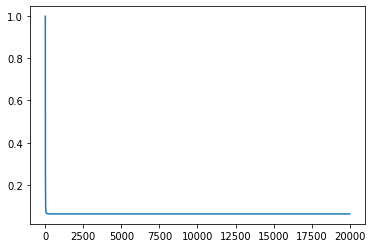

In [88]:
plt.plot(c_list, data[-1,-1,:])
print(data[-1,-1,:])

Text(0.5, 1.0, 'CKA according to "c", the distance between the first and\nsecond Gaussians in the second set of representations')

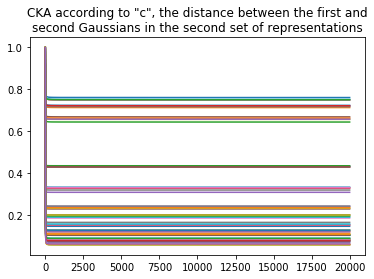

In [84]:
for i in range(len(num_pts_list)):
    for j in range(len(num_dims_list)):
        plt.plot(c_list, data[i,j,:])
        
plt.title('CKA according to "c", the distance between the first and\nsecond Gaussians in the second set of representations')

As expected CKA decreases pretty quickly as the distance between the two Gaussians in the second set of representations increases. The rate at which CKA drops is pretty dramatic, reaching sub 0.2 value almost from the start.

For mean2 = 10 at the start: all the CKAs stay above .98 I'm guessing the distance between the two Gaussians is already to large and the same structure kind of holds for large c's

For mean2 = 2 at the start: all the CKAs stay above .94 Gaussian anulus... this is too large for large dimensions

Even for mean2 = 1 it doesn't go down almost at all

Text(0.5, 1.0, 'CKA according to the number of dimensions')

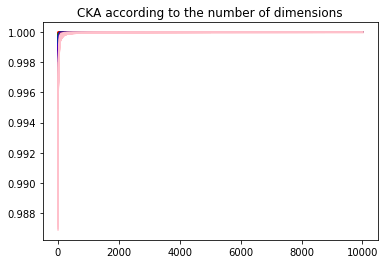

In [36]:
for i in range(len(num_pts_list)):
    for j in range(len(c_list)):
        if j == 0: color = 'r'
        elif j == 1: color = 'g'
        elif j == 2: color = 'b'
        elif j == 3: color = 'purple'
        else: color = 'pink'
        plt.plot(num_dims_list, data[i,:,j], c = color)
        
plt.title('CKA according to the number of dimensions')

Red is c=1, green is c=5, blue is c=10, purple is c= 50, pink is c>= 100
For low distances between Gaussians (small "c") CKA increases with the number of dimensions, althought it plateaus eventually.
NOT TRUE ANYMORE COLORS WERE CHANGED

Text(0.5, 1.0, 'CKA according to the number of points used to compute CKA')

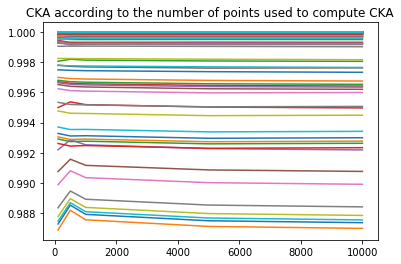

In [37]:
for i in range(len(num_dims_list)):
    for j in range(len(c_list)):
        plt.plot(num_pts_list, data[:,i,j])
        
plt.title('CKA according to the number of points used to compute CKA')

The number of points used to compute CKA does not affect the CKA value by much. Except at low number of points CKA values tend to be slightly higher but after 1000 points per Gaussian the CKA values remain stable.

For mean2=10 initially: same results hold pretty much

## Multiple seeds

In [90]:
num_pts = 10000
num_dims = 1000
num_seeds = 10
c_list = [1, 5, 10, 25, 50, 75, 100, 200, 300, 400, 500]

data = np.zeros([num_seeds, len(c_list)])
for seed in range(num_seeds):
    print(f'seed {seed}')
    for i, c in enumerate(c_list):
        data[seed, i] = get_cka_test(mean2=1.1, num_dims = num_dims, num_pts = num_pts, c = c, seed = seed, distribution = 'uniform')
            
np.save('data/two_cubes_exp_lincka2_means_0_1.1_{}seeds.npy'.format(num_seeds), data)

seed 0
seed 1
seed 2
seed 3
seed 4
seed 5
seed 6
seed 7
seed 8
seed 9


Text(0.5, 1.0, 'CKA according to "c", the translation distance')

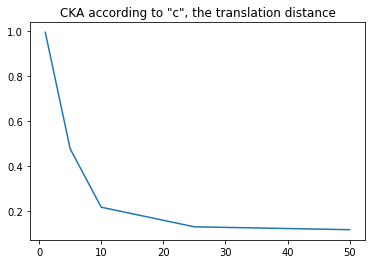

In [95]:
translation_means = np.mean(data, axis = 0)
translation_stds = np.std(data, axis = 0)

end = -6

plt.plot(c_list[:end], translation_means[:end])
plt.fill_between(c_list[:end], translation_means[:end]-translation_stds[:end], translation_means[:end]+translation_stds[:end], alpha = 0.5)

plt.title('CKA according to "c", the translation distance')

In [96]:
translation_stds

array([0.00052428, 0.00307591, 0.00086315, 0.0009861 , 0.00098654,
       0.00098237, 0.00097981, 0.00097558, 0.00097412, 0.00097337,
       0.00097293])

# Invertible linear transformations

In [58]:
def inv_lin_cka(pts_mean = 0,
                pts_var = 1,
                transform_mean = 0,
                transform_var = 1,
                num_dims = 200,
                num_pts = 10000,
                seed = 0):
    
    np.random.seed(seed)
    rotation_matrix = np.random.normal(transform_mean, transform_var,[num_dims, num_dims])
    while np.linalg.cond(rotation_matrix) >= 1/sys.float_info.epsilon:
        rotation_matrix = np.random.normal(transform_mean, transform_var,[num_dims, num_dims])

    cuda = torch.device('cuda')
    rotation_matrix = torch.Tensor(rotation_matrix).to(cuda)
    
    X = np.random.normal(pts_mean, pts_var, [num_pts, num_dims])
    X = torch.Tensor(X).to(cuda)
    
    Y = torch.mm(X,rotation_matrix)

    CKA = LinCKA2()
    return CKA(X,Y).item()

In [60]:
num_pts = 10000#, 10000 and 20000 points makes it crash have other things running as well...
num_dims = 500
num_seeds = 10
mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]


data = np.zeros([num_seeds, len(mu_list), len(sigma_list)])
for seed in range(num_seeds):
    print(f'seed {seed}')
    for i1, mu in enumerate(mu_list):
        for i2, sigma in enumerate(sigma_list):
            data[seed, i1, i2] = inv_lin_cka(num_dims = num_dims, num_pts = num_pts, transform_mean=mu, transform_var=sigma, seed = seed)
            
np.save('data/inv_lin_cka_fig_data_lincka2_v0_10k.npy', data)

seed 0
seed 1
seed 2
seed 3
seed 4
seed 5
seed 6
seed 7
seed 8
seed 9


In [ ]:
data = np.load('data/inv_lin_cka_fig_data_lincka2_v0.npy')

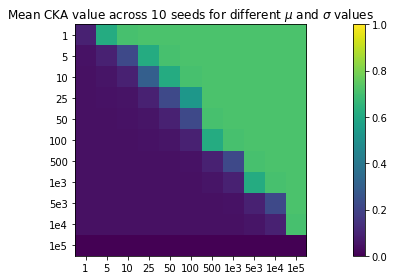

In [61]:
mean_data = np.mean(data, axis = 0)

mu_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3', '1e4', '1e5']
sigma_list_labels = ['1', '5', '10', '25', '50', '100', '500', '1e3', '5e3', '1e4', '1e5']
     
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(mean_data, interpolation ='nearest', vmin=0, vmax=1)
fig.colorbar(cax)
ax.set_title(r'Mean CKA value across 10 seeds for different $\mu$ and $\sigma$ values')
ax.set_xticks(np.arange(len(sigma_list)))
ax.set_yticks(np.arange(len(mu_list)))
ax.set_xticklabels(sigma_list_labels)
ax.set_yticklabels(mu_list_labels)
ax.axis('image')
# plt.ticklabel_format(axis="x", style="sci")
# plt.ticklabel_format(axis="y", style="sci")
plt.tight_layout()
#         plt.savefig('figures/split_exp_figures_v1/split_class_exp_train_{}pts_'.format(num_pts_cka)+dirr+'.png')

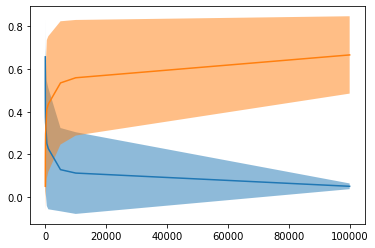

In [6]:
mu_means = np.mean(data, axis = (0,2))
mu_stds = np.std(data, axis = (0,2))
sigma_means = np.mean(data, axis = (0,1))
sigma_stds = np.std(data, axis = (0,1))

mu_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]
sigma_list = [1, 5, 10, 25, 50, 100, 500, 1000, 5000, 1e4, 1e5]


plt.plot(mu_list, mu_means)
plt.fill_between(mu_list, mu_means-mu_stds, mu_means+mu_stds, alpha = 0.5)

plt.plot(sigma_list, sigma_means)
plt.fill_between(sigma_list, sigma_means-sigma_stds, sigma_means+sigma_stds, alpha = 0.5)

# plt.title('CKA according to "c", the translation distance')

# Non isotropic scaling

In [62]:
def anisotropic_scaling_cka(mean = 0,
                var = 1,
                u_range = 1,
                num_dims = 200,
                num_pts = 10000,
                seed = 0):
    
    cuda = torch.device('cuda')
    
    np.random.seed(seed)
    
    anisotropic_scaling = u_range*np.diag(np.random.rand(num_dims))
    anisotropic_scaling = torch.Tensor(anisotropic_scaling).to(cuda)
    
    X = np.random.normal(mean, var, [num_pts, num_dims])
    X = torch.Tensor(X).to(cuda)
    
    Y = torch.mm(X, anisotropic_scaling)

    CKA = LinCKA2()
    return CKA(X,Y).item()

In [ ]:
# num_pts_list = [100, 500, 1000, 5000, 10000] #20000 points makes it crash
# num_dims_list = [3, 5, 10, 50, 100, 200, 300, 500, 750, 1000, 1500, 2000, 3000]#, 5000, 10000]
# c_list = [1, 5, 10, 25, 50, 75, 100, 200, 300, 400, 500, 1000]

num_pts_list = [100, 500, 1000, 5000, 10000]
num_dims_list = [5, 50, 100, 300, 500, 1000, 2000]
c_list = [1, 5, 10, 25, 50, 75, 100, 200, 300, 400, 500, 1000]


data = np.zeros([len(num_pts_list), len(num_dims_list), len(c_list)])
for i1, num_pts in enumerate(num_pts_list):
    for i2, num_dims in enumerate(num_dims_list):
        for i3, c in enumerate(c_list):
            print('Num pts {}; num dims {}; c {}'.format(num_pts, num_dims, c))
            data[i1, i2, i3] = anisotropic_scaling_cka(num_dims = num_dims, num_pts = num_pts, u_range = c)
            
np.save('data/anisotropic_scaling_lincka2_v0.npy', data)

### Analyze results

Text(0.5, 1.0, 'CKA according to "c"')

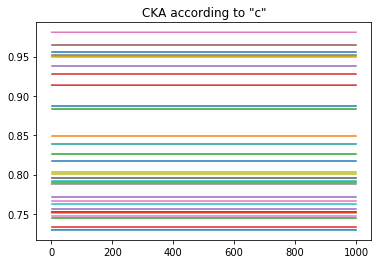

In [64]:
for i in range(len(num_pts_list)):
    for j in range(len(num_dims_list)):
        plt.plot(c_list, data[i,j,:])
        
plt.title('CKA according to "c"')

Text(0.5, 1.0, 'CKA according to the number of dimensions')

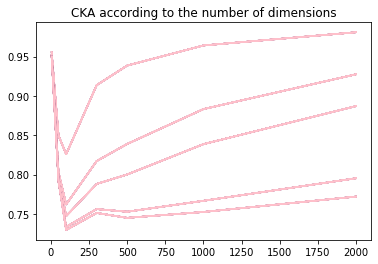

In [65]:
for i in range(len(num_pts_list)):
    for j in range(len(c_list)):
        if j == 0: color = 'r'
        elif j == 1: color = 'g'
        elif j == 2: color = 'b'
        elif j == 3: color = 'purple'
        else: color = 'pink'
        plt.plot(num_dims_list, data[i,:,j], c = color)
        
plt.title('CKA according to the number of dimensions')

Text(0.5, 1.0, 'CKA according to the number of points used to compute CKA')

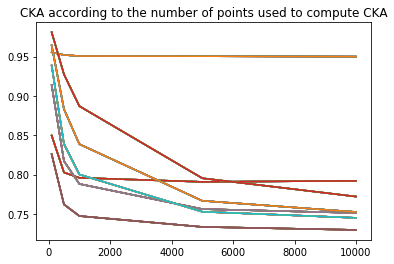

In [66]:
for i in range(len(num_dims_list)):
    for j in range(len(c_list)):
        plt.plot(num_pts_list, data[:,i,j])
        
plt.title('CKA according to the number of points used to compute CKA')